In [126]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv('Data\Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [127]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


df.isnull().sum()

In [128]:
print(df.isna().sum())
print(df.isnull().sum())


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


# there is no null , missing values hence no imputation needed
# there were 3 duplicate rows, removed all duplicates

In [129]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [130]:
# drop column Id to check gor duplicatesd
df.drop(['Id'], axis=1, inplace=True)


In [131]:
df.duplicated().sum()

3

In [132]:
df=df.drop_duplicates()

In [133]:
df.shape

(147, 5)

In [134]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Feature vectors are 	SepalLengthCm	SepalWidthCm	PetalLengthCm	PetalWidthCm	
# Target Vector Species

In [135]:
# Distribution and outliers on feature vectors


In [136]:
fea_vec=df.columns

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

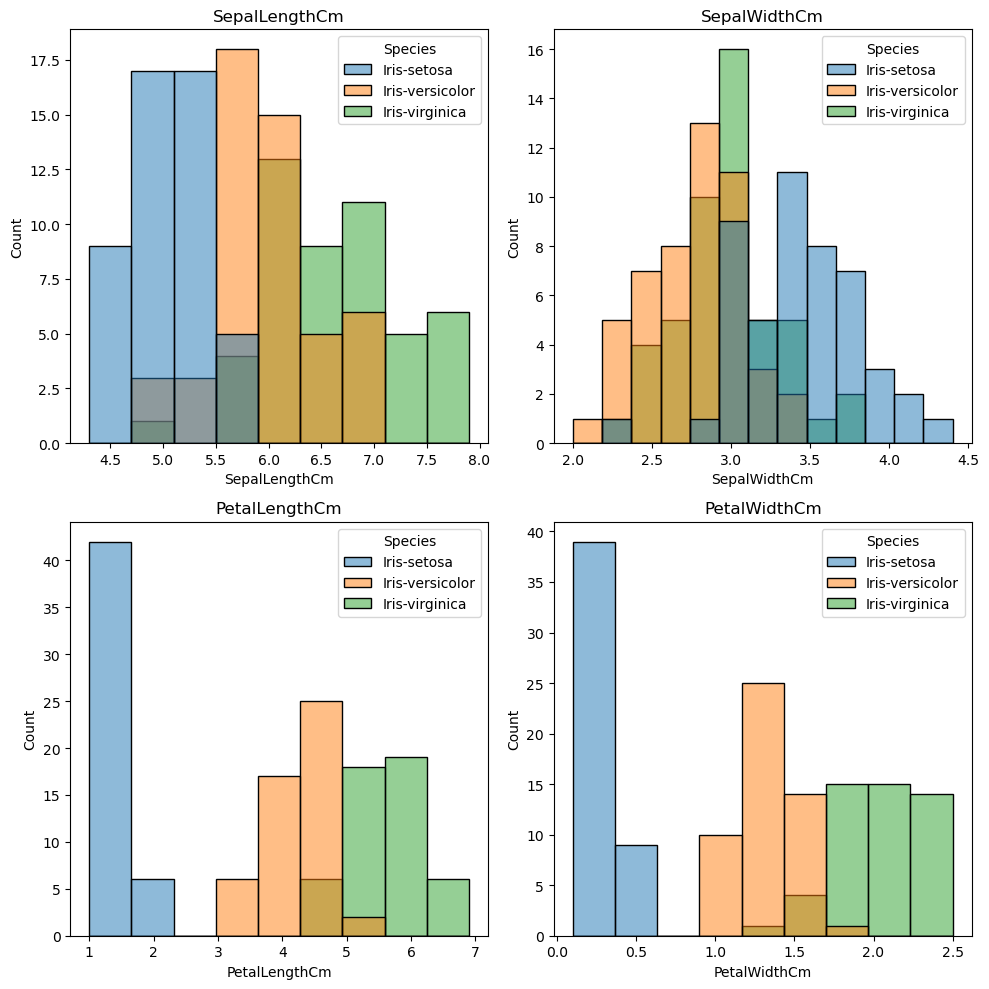

In [137]:
'''plt.figure(figsize=(5,5))
for i in range(len(fea_vec)):
    plt.subplot(2,2, i+1)
    plt.title(fea_vec[i])
    plt.hist(df[fea_vec[i]])
plt.tight_layout()
### with these graphs we were not able to differntiate the feature vector variation w.r.t traget vector species
'''
plt.figure(figsize=(10,10))
for i in range(len(fea_vec)-1):
    plt.subplot(2,2, i+1)
    plt.title(fea_vec[i])
    #sns.histplot(df[fea_vec[i]], kde=True, stat='probability', hue='Species')  # Error ValueError: The following variable cannot be assigned with wide-form data: `hue`, why?? 
    sns.histplot(data=df,x=fea_vec[i], kde=False, hue='Species', stat='count') 
plt.tight_layout()

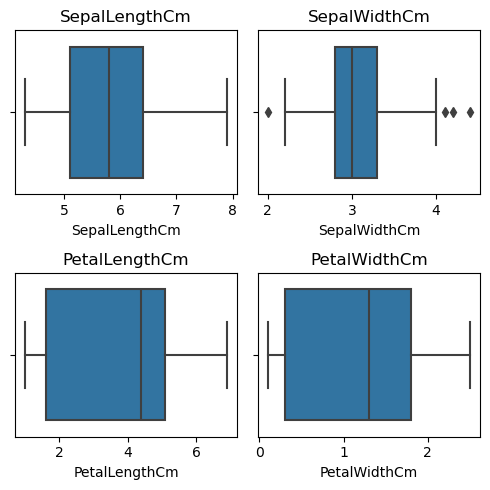

In [138]:

plt.figure(figsize=(5,5))
for i in range(len(fea_vec)-1):
    plt.subplot(2,2, i+1)
    plt.title(fea_vec[i])
    #sns.histplot(df[fea_vec[i]], kde=True, stat='probability') #  hue='Species'
    sns.boxplot(data=df, x=fea_vec[i])
    #sns.histplot(data=df,x=fea_vec[i], kde=False, hue='Species', stat='count') #why this does not work
plt.tight_layout()

# SepalWidthCm has outliers. What to do with outliers , do we remove such values?
# PetalLengthCm and PetalWidthCm can help identify the Species.
# Iris-setosa can be clearly identified with PetalLengthCm and PetalWidthCm.

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


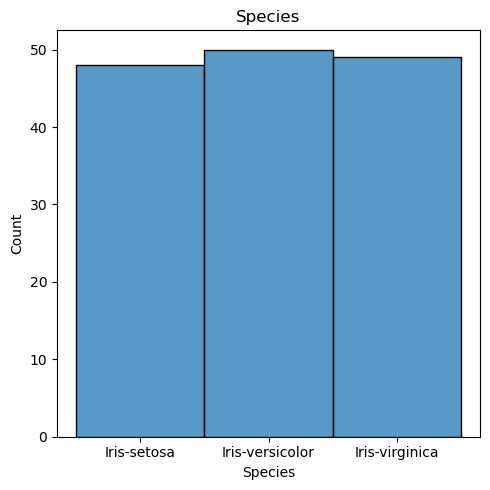

In [139]:
# Species is target vector
plt.figure(figsize=(5,5))

plt.title('Species')
    #sns.histplot(df[fea_vec[i]], kde=True, stat='probability') #  hue='Species'
sns.histplot(data=df,x='Species', kde=False, stat='count') #why this does not work
plt.tight_layout()

# Target vector is balanced. Hence we can use this data to train our model